## Project_2:House_price_prediction

### Name: M. Pavan Ganesh

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
#loading data
df=pd.read_csv('House_Rent_Dataset.csv')


In [5]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [6]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [8]:
df['BHK'].value_counts()

2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: BHK, dtype: int64

In [9]:
df['Bathroom'].value_counts()

2     2291
1     1474
3      749
4      156
5       60
6       12
7        3
10       1
Name: Bathroom, dtype: int64

<AxesSubplot:xlabel='Rent'>

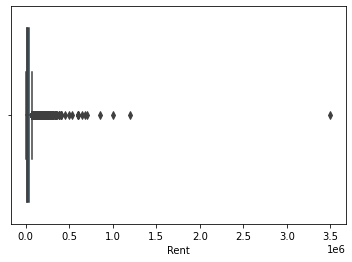

In [10]:
sns.boxplot(df['Rent'])

<AxesSubplot:xlabel='Rent'>

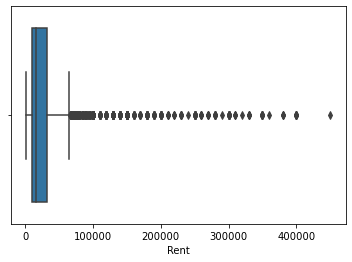

In [11]:
#Removing the Outlier
df = df[df["Rent"]<500000]
sns.boxplot(df['Rent'])

<AxesSubplot:xlabel='BHK', ylabel='Rent'>

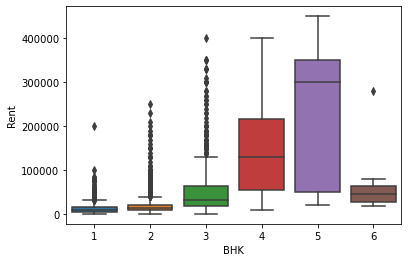

In [12]:
sns.boxplot(df["BHK"],df["Rent"])

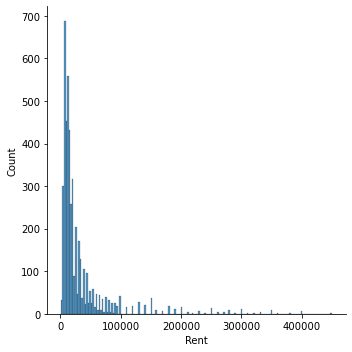

In [13]:
sns.displot(df['Rent'])

<AxesSubplot:xlabel='Area Type', ylabel='Rent'>

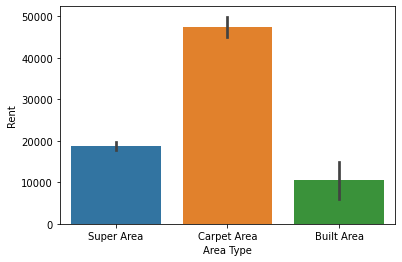

In [14]:
sns.barplot(df['Area Type'],df['Rent'])
#This indicates Rent is higher for Area Type as Carpet Area

<AxesSubplot:xlabel='Furnishing Status', ylabel='Rent'>

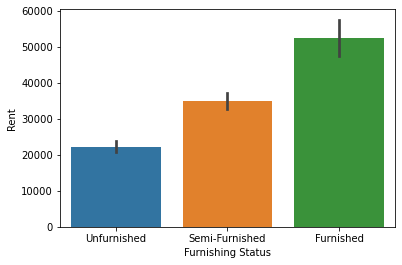

In [15]:
sns.barplot(df['Furnishing Status'],df['Rent'])
#this shows furnished houses have more Rent

In [16]:
df["City"].value_counts()
#One Hot Encoding can be applied here

Mumbai       962
Chennai      890
Bangalore    885
Hyderabad    868
Delhi        604
Kolkata      524
Name: City, dtype: int64

In [17]:
df["Tenant Preferred"].value_counts()


Bachelors/Family    3435
Bachelors            827
Family               471
Name: Tenant Preferred, dtype: int64

# Cleaning data

### Converting all the House Size into Super Built Up Area Type size

In [18]:
def Area_conv(cols):
    area_type =cols[0]
    size = cols[1]
    
    if(area_type=='Carpet Area'):
            return size*1.5
    elif(area_type=='Built Area'):
            return size*1.4
    else:
            return size

In [19]:
df["Size"] =df[["Area Type", "Size"]].apply(Area_conv, axis=1)
#Now all the Size has been converted into super built up area format

<AxesSubplot:xlabel='Size', ylabel='Rent'>

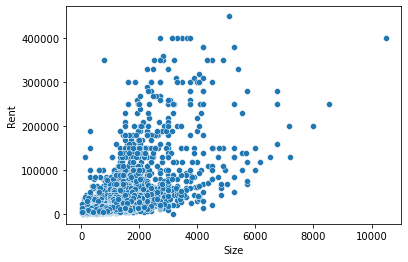

In [20]:
sns.scatterplot(df['Size'],df['Rent'])

In [21]:
df["Floor"] = df["Floor"].str.replace("Ground","0")
df["House Floor"] = df["Floor"].str.split(" ").str.get(0)
df["Total Floors"] = df["Floor"].str.split(" ").str.get(-1)

print(df["House Floor"].unique())
print(df["Total Floors"].unique())
df.drop(['Floor'],axis=1,inplace=True)

df["House Floor"] = df["House Floor"].replace("Lower","0")

['0' '1' '2' '4' '3' '5' '7' '8' 'Upper' '11' 'Lower' '6' '14' '43' '13'
 '18' '17' '9' '19' '60' '34' '12' '26' '25' '53' '16' '10' '39' '32' '47'
 '28' '20' '15' '65' '40' '37' '22' '21' '30' '35' '33' '44' '41' '46'
 '27' '45' '48' '50' '24' '23' '29' '49' '36' '76']
['2' '3' '1' '4' '5' '14' '8' '6' '19' '10' '7' '13' '78' '18' '12' '24'
 '31' '21' '23' '20' '9' '22' '58' '16' '66' '48' '40' '44' '42' '41' '60'
 '32' '30' '29' '89' '15' '11' '28' '17' '45' '35' '75' '38' '51' '43'
 '25' '27' '26' '76' '36' '37' '55' '68' '77' '50' '59' '62' '39' '52'
 '54' '33' '46' '85' '71' '81' '34' '0']


In [22]:
df.loc[df["House Floor"] == "Upper", "House Floor"] = df.loc[df["House Floor"]=="Upper", "Total Floors"]
df["House Floor"].unique()

array(['0', '1', '2', '4', '3', '5', '7', '8', '11', '6', '14', '43',
       '13', '18', '17', '9', '19', '16', '60', '34', '12', '26', '25',
       '53', '10', '39', '32', '47', '28', '20', '40', '15', '65', '37',
       '30', '22', '21', '35', '33', '44', '41', '46', '27', '45', '48',
       '50', '24', '23', '29', '49', '36', '76'], dtype=object)

In [23]:
df["House Floor"] = df["House Floor"].astype(int) 
df["Total Floors"] = df["Total Floors"].astype(int)

In [24]:
df["Area Locality"].value_counts()

Bandra West                                           36
Gachibowli                                            29
Electronic City                                       24
Velachery                                             22
Miyapur, NH 9                                         22
                                                      ..
Hindu Colony                                           1
sarsuna banerjee para                                  1
Kacharakanahalli                                       1
Delhi estate Apartment                                 1
Hiranandani Gardens Odyssey I, Hiranandani Gardens     1
Name: Area Locality, Length: 2229, dtype: int64

In [25]:
df["Area Locality"]= df["Area Locality"].apply(lambda x: x.strip())
area_count = df["Area Locality"].value_counts()
area_count_less10 = area_count[area_count<10]
area_count_less10 

Himayath Nagar, NH 7                                  9
Baghajatin                                            9
Nizampet                                              9
Koramangala                                           9
Salt Lake City                                        9
                                                     ..
Garia Dhalua Nabapally                                1
Hindu Colony                                          1
sarsuna banerjee para                                 1
Kacharakanahalli                                      1
Hiranandani Gardens Odyssey I, Hiranandani Gardens    1
Name: Area Locality, Length: 2165, dtype: int64

In [26]:
df["Area Locality"] = df["Area Locality"].apply(lambda x: 'other' if x in area_count_less10 else x)
df["Area Locality"].value_counts()

other                              3848
Bandra West                          36
Gachibowli                           29
Electronic City                      24
Miyapur, NH 9                        22
                                   ... 
Paschim Vihar                        10
Thiruvanmiyur                        10
Rajajinagar                          10
Adyar, Sardar Patel Road             10
Arjun Nagar, Safdarjung Enclave      10
Name: Area Locality, Length: 64, dtype: int64

In [27]:
df.drop(["Posted On"],axis=1,inplace=True)

In [28]:
df.corr()

,BHK,Rent,Size,Bathroom,House Floor,Total Floors
BHK,1.000000,0.500495,0.703589,0.791058,0.219796,0.245135
Rent,0.500495,1.000000,0.589589,0.612033,0.501731,0.542902
Size,0.703589,0.589589,1.000000,0.733493,0.234580,0.260725
Bathroom,0.791058,0.612033,0.733493,1.000000,0.328272,0.360741
House Floor,0.219796,0.501731,0.234580,0.328272,1.000000,0.867877
Total Floors,0.245135,0.542902,0.260725,0.360741,0.867877,1.000000


In [29]:
df
# Encoding
#nominal categories : Area Locality, City, Tenant Preferred, Point of Contact
#Ordinal categories: Furnishing status, Area Type

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,House Floor,Total Floors
0,2,10000,1100.0,Super Area,other,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2,20000,800.0,Super Area,other,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2,17000,1000.0,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2,10000,800.0,Super Area,other,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2,7500,1275.0,Carpet Area,other,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1500.0,Carpet Area,other,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5
4742,3,29000,2000.0,Super Area,other,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,4
4743,3,35000,2625.0,Carpet Area,other,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,3,5
4744,3,45000,2250.0,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,23,34


In [30]:
df.describe()

,BHK,Rent,Size,Bathroom,House Floor,Total Floors
count,4733.000000,4733.000000,4733.000000,4733.000000,4733.000000,4733.000000
mean,2.078386,32552.064230,1204.938306,1.959645,3.492288,6.949292
std,0.825666,48182.337048,859.137211,0.876491,5.830969,9.454208
min,1.000000,1200.000000,15.000000,1.000000,0.000000,0.000000
25%,2.000000,10000.000000,675.000000,1.000000,1.000000,2.000000
50%,2.000000,16000.000000,1000.000000,2.000000,2.000000,4.000000
75%,3.000000,32000.000000,1500.000000,2.000000,3.000000,6.000000
max,6.000000,450000.000000,10500.000000,10.000000,76.000000,89.000000


### CATEGORICAL ENCODING

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [32]:
oe = OrdinalEncoder(categories=[['Unfurnished','Semi-Furnished','Furnished']])
df["Furnishing Status"] = oe.fit_transform(df[['Furnishing Status']])

In [33]:
oe = OrdinalEncoder(categories=[['Super Area','Built Area','Carpet Area']])
df['Area Type'] = oe.fit_transform(df[['Area Type']])

In [34]:
df

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,House Floor,Total Floors
0,2,10000,1100.0,0.0,other,Kolkata,0.0,Bachelors/Family,2,Contact Owner,0,2
1,2,20000,800.0,0.0,other,Kolkata,1.0,Bachelors/Family,1,Contact Owner,1,3
2,2,17000,1000.0,0.0,Salt Lake City Sector 2,Kolkata,1.0,Bachelors/Family,1,Contact Owner,1,3
3,2,10000,800.0,0.0,other,Kolkata,0.0,Bachelors/Family,1,Contact Owner,1,2
4,2,7500,1275.0,2.0,other,Kolkata,0.0,Bachelors,1,Contact Owner,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1500.0,2.0,other,Hyderabad,1.0,Bachelors/Family,2,Contact Owner,3,5
4742,3,29000,2000.0,0.0,other,Hyderabad,1.0,Bachelors/Family,3,Contact Owner,1,4
4743,3,35000,2625.0,2.0,other,Hyderabad,1.0,Bachelors/Family,3,Contact Agent,3,5
4744,3,45000,2250.0,2.0,Gachibowli,Hyderabad,1.0,Family,2,Contact Agent,23,34


In [35]:
x = df.drop(columns=['Rent','Point of Contact'],axis=1)
y = df['Rent']

In [36]:
x= pd.get_dummies(x)

In [37]:
x

,BHK,Size,Area Type,Furnishing Status,Bathroom,House Floor,Total Floors,"Area Locality_Adyar, Sardar Patel Road",Area Locality_Ambattur,Area Locality_Andheri West,...,Area Locality_whitefield,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,2,1100.0,0.0,0.0,2,0,2,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,2,800.0,0.0,1.0,1,1,3,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2,1000.0,0.0,1.0,1,1,3,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,2,800.0,0.0,0.0,1,1,2,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,2,1275.0,2.0,0.0,1,1,2,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,1500.0,2.0,1.0,2,3,5,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4742,3,2000.0,0.0,1.0,3,1,4,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4743,3,2625.0,2.0,1.0,3,3,5,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4744,3,2250.0,2.0,1.0,2,23,34,0,0,0,...,0,0,0,0,1,0,0,0,0,1


### Model Building

In [38]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [39]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)
y = np.log(y)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [41]:
def mymodel(model):
    #model creation
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    #checking bias & Variance
    train = model.score(xtrain, ytrain)
    test = model.score(xtest, ytest)
    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
    
    r2 = r2_score(ytest, ypred)
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    print(f'r2 score: {r2}, mae: {mae}, rmse: {rmse}')
    
    return model

### Linear Regression

In [42]:
linreg = mymodel(LinearRegression())

Training Accuracy : 0.6652300010985821
Testing Accuracy : 0.669098674063467


r2 score: 0.669098674063467, mae: 15542.254413255148, rmse: 26544.171574363816


### Gradient Boost->best accuracy

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = mymodel(GradientBoostingRegressor())

Training Accuracy : 0.8533889817713092
Testing Accuracy : 0.861520745059328


r2 score: 0.861520745059328, mae: 8723.533303213133, rmse: 17171.66001734076


#### Gradient Boost gives the higest accuracy (86%) and it has low bias and low variance as well

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [46]:
estimator = GradientBoostingRegressor()
param_grid = { 
        "n_estimators"      : [60,80,100,120,140],
        "min_samples_leaf"  : [3,4,5,6,7],
        }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)
grid.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'min_samples_leaf': [3, 4, 5, 6, 7],
                         'n_estimators': [60, 80, 100, 120, 140]})

In [47]:
grid.best_params_

{'min_samples_leaf': 3, 'n_estimators': 120}

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
gbr1 = mymodel(GradientBoostingRegressor(min_samples_leaf=3, n_estimators=120))

Training Accuracy : 0.8511026209511766
Testing Accuracy : 0.85884235692294


r2 score: 0.85884235692294, mae: 8763.217394690208, rmse: 17336.92703096648


In [49]:
gbr2 = mymodel(GradientBoostingRegressor())


Training Accuracy : 0.8533889817713092
Testing Accuracy : 0.8608516750087245


r2 score: 0.8608516750087245, mae: 8752.425926956425, rmse: 17213.092935871227


### Conclusion:

#This project predicts the Rent of the House based and final model selected in this "Gradient Boosting Regressor" gives us the accuracy (r2_score of 0.861) 